<a href="https://colab.research.google.com/github/Shankjbs571/Machine-Learning-Techniques/blob/main/Reso_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import sklearn
import numpy as np

# from sklearn.preprocessing import
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [12]:
import matplotlib.pyplot as plt


In [42]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ResoluteAI/T1_train.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ResoluteAI/T1_test.csv')
print(test_dataset.info())
print(dataset.head())


#looking for uniue target
print(dataset['target'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T1      15752 non-null  int64
 1   T2      15752 non-null  int64
 2   T3      15752 non-null  int64
 3   T4      15752 non-null  int64
 4   T5      15752 non-null  int64
 5   T6      15752 non-null  int64
 6   T7      15752 non-null  int64
 7   T8      15752 non-null  int64
 8   T9      15752 non-null  int64
 9   T10     15752 non-null  int64
 10  T11     15752 non-null  int64
 11  T12     15752 non-null  int64
 12  T13     15752 non-null  int64
 13  T14     15752 non-null  int64
 14  T15     15752 non-null  int64
 15  T16     15752 non-null  int64
 16  T17     15752 non-null  int64
 17  T18     15752 non-null  int64
dtypes: int64(18)
memory usage: 2.2 MB
None
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -7

In [43]:
encoder = OrdinalEncoder()
encoded_target = encoder.fit_transform(dataset[['target']])
encoded_target
encoded_df = pd.DataFrame(encoded_target, columns=encoder.get_feature_names_out(['target']))
print(encoded_df)


       target
0       110.0
1       137.0
2        10.0
3        14.0
4        26.0
...       ...
36747   107.0
36748    86.0
36749    55.0
36750    91.0
36751   119.0

[36752 rows x 1 columns]


In [19]:
dataset.drop(['target'],axis=1, inplace=True)
print(dataset.info())
concat_dataset = pd.concat([dataset, encoded_df], axis=1)
print(concat_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T1      36752 non-null  int64
 1   T2      36752 non-null  int64
 2   T3      36752 non-null  int64
 3   T4      36752 non-null  int64
 4   T5      36752 non-null  int64
 5   T6      36752 non-null  int64
 6   T7      36752 non-null  int64
 7   T8      36752 non-null  int64
 8   T9      36752 non-null  int64
 9   T10     36752 non-null  int64
 10  T11     36752 non-null  int64
 11  T12     36752 non-null  int64
 12  T13     36752 non-null  int64
 13  T14     36752 non-null  int64
 14  T15     36752 non-null  int64
 15  T16     36752 non-null  int64
 16  T17     36752 non-null  int64
 17  T18     36752 non-null  int64
dtypes: int64(18)
memory usage: 5.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
-

In [23]:
concat_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
T1,36752.0,-65.865449,8.737286,-95.0,-72.0,-66.0,-61.0,-41.0
T2,36752.0,-64.521931,8.914559,-95.0,-70.0,-65.0,-59.0,-37.0
T3,36752.0,-64.574472,8.154517,-95.0,-70.0,-64.0,-59.0,-41.0
T4,36752.0,-65.296474,8.142803,-95.0,-70.0,-66.0,-61.0,-39.0
T5,36752.0,-64.462152,8.068375,-95.0,-69.0,-65.0,-59.0,-36.0
T6,36752.0,-63.318731,8.651501,-95.0,-69.0,-63.0,-57.0,-39.0
T7,36752.0,-67.030202,9.257529,-95.0,-74.0,-66.0,-60.0,-45.0
T8,36752.0,-66.591260,10.160193,-95.0,-75.0,-66.0,-59.0,-39.0
T9,36752.0,-65.692479,10.598247,-95.0,-73.0,-65.0,-58.0,-39.0
T10,36752.0,-65.555181,10.408147,-95.0,-73.0,-65.0,-58.0,-37.0


32.0     635
26.0     633
21.0     432
22.0     429
119.0    428
        ... 
19.0     191
141.0    191
65.0     190
9.0      189
79.0     188
Name: target, Length: 160, dtype: int64


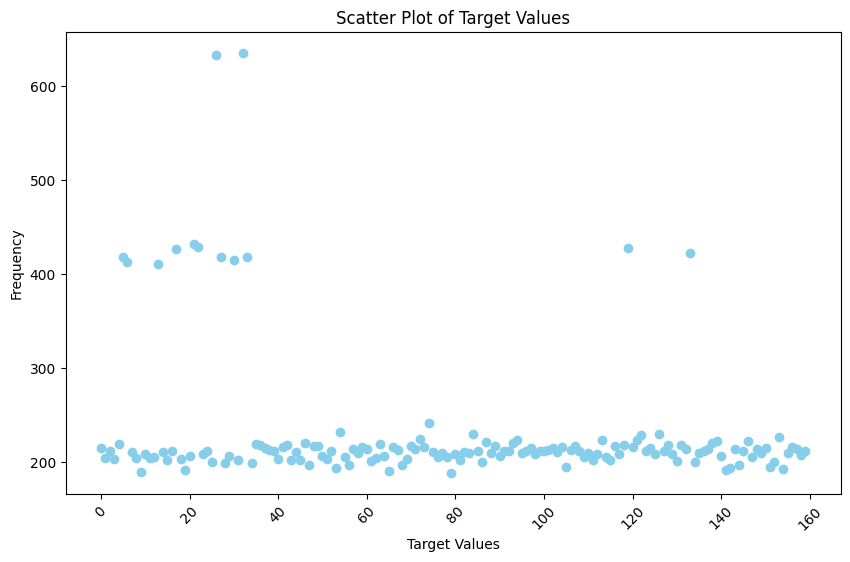

In [31]:
print(concat_dataset['target'].value_counts())
value_counts = concat_dataset['target'].value_counts()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Target Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Text(0, 0.5, 'Count')

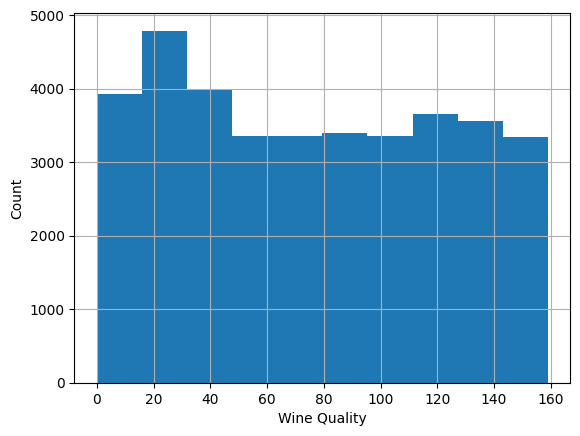

In [32]:
concat_dataset.target.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

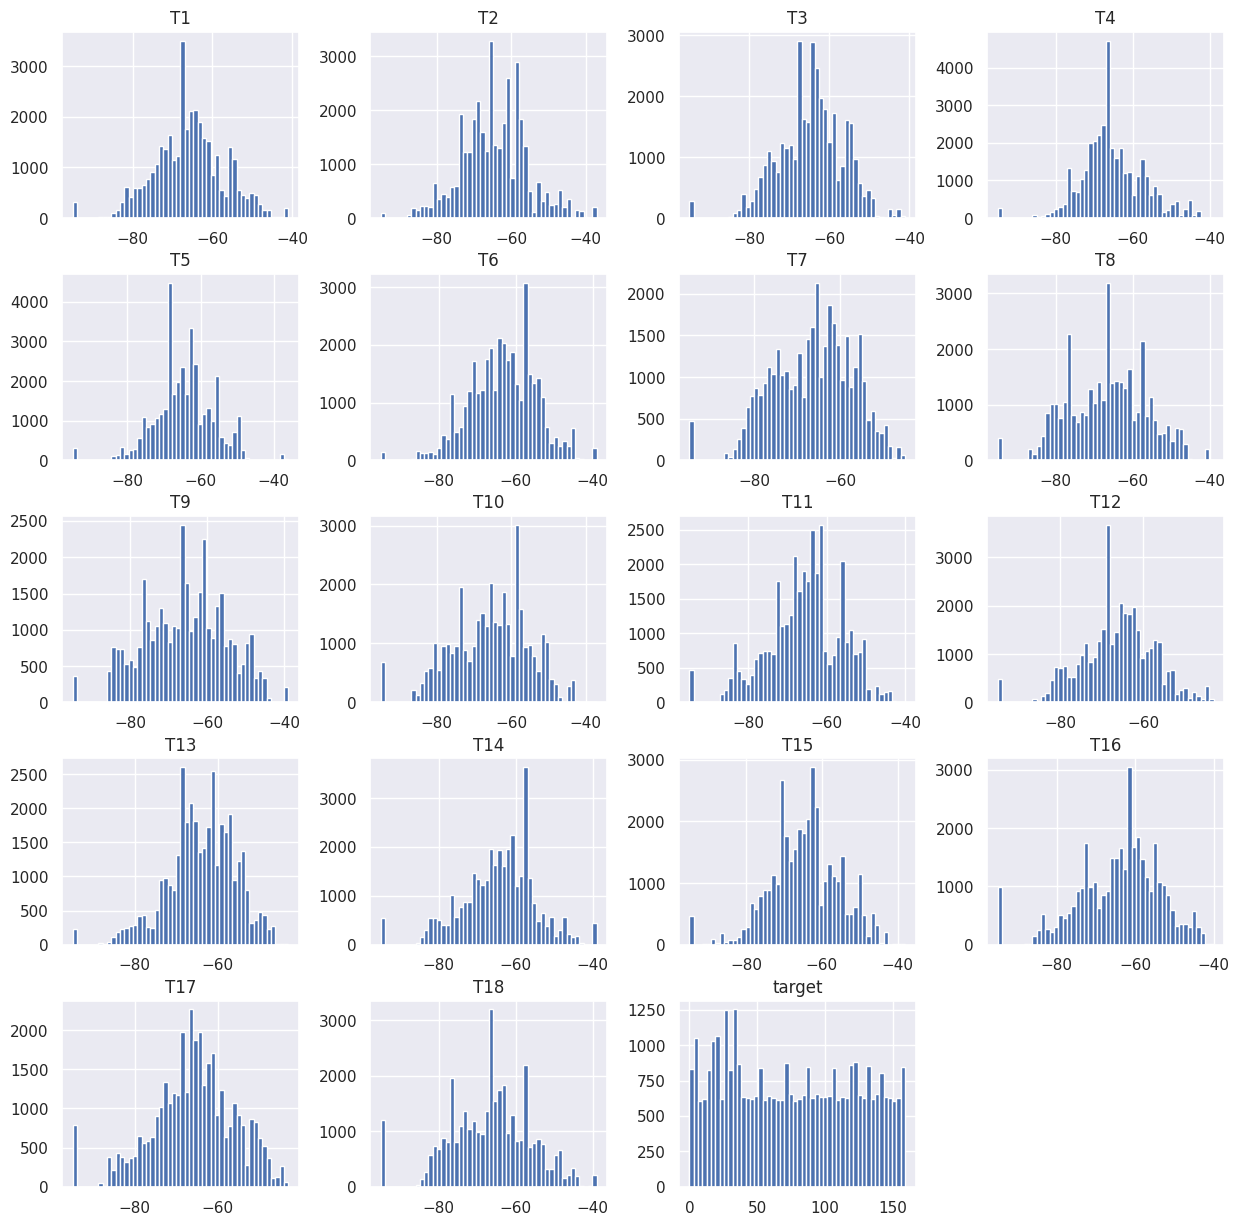

In [35]:
import seaborn as sns
sns.set()
concat_dataset.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

<Axes: >

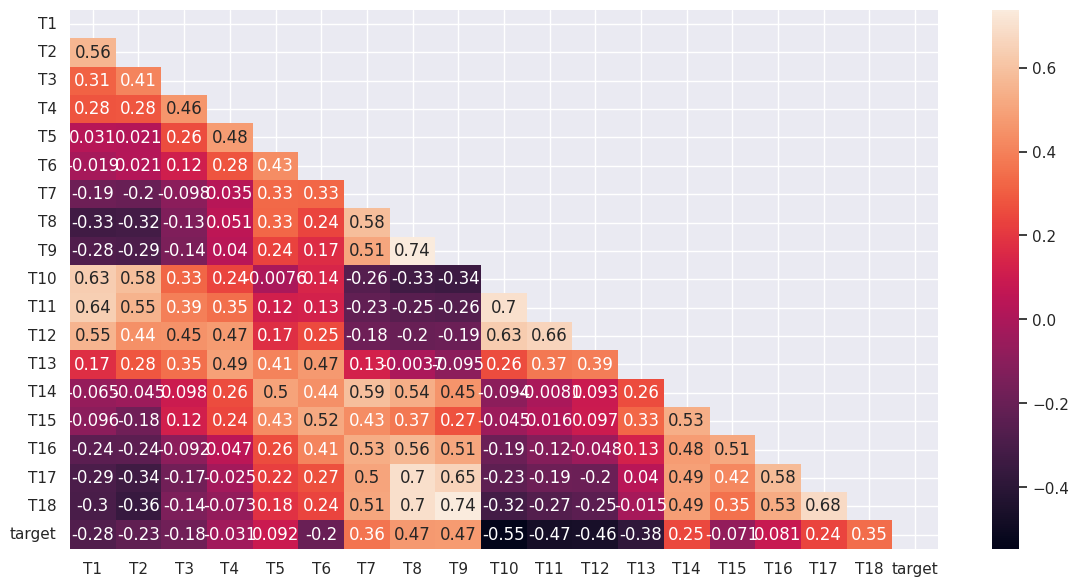

In [36]:
cor_data = concat_dataset.copy()
corr_matrix = cor_data.corr()
plt.figure(figsize=(14,7))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask= mask)

<class 'numpy.ndarray'>
[[  2.67042863   0.47223593]
 [-26.27246046  16.99215516]
 [ 17.80794818 -22.04502967]
 ...
 [ 40.03293338  13.45909667]
 [ 26.78666186   2.48391508]
 [-20.71811543   6.94267981]]


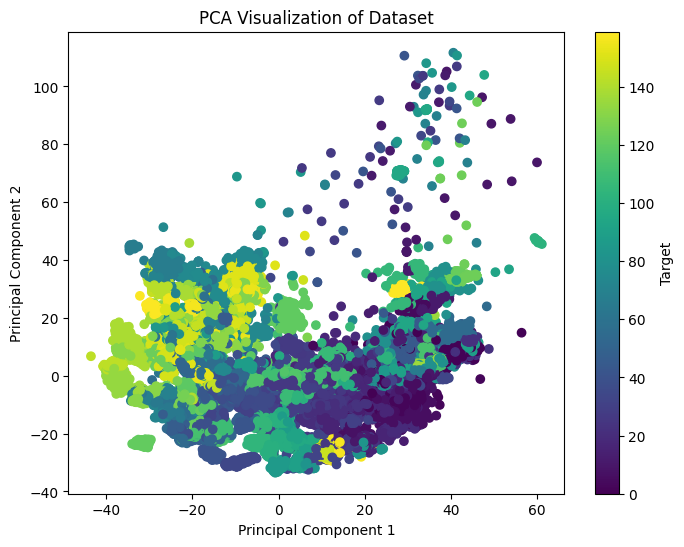

In [21]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(concat_dataset.iloc[:,:17])
print(type(X_pca))
print(X_pca)
# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=concat_dataset['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Dataset')
plt.colorbar(label='Target')
plt.show()

In [37]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 2 ... 2 0 1]


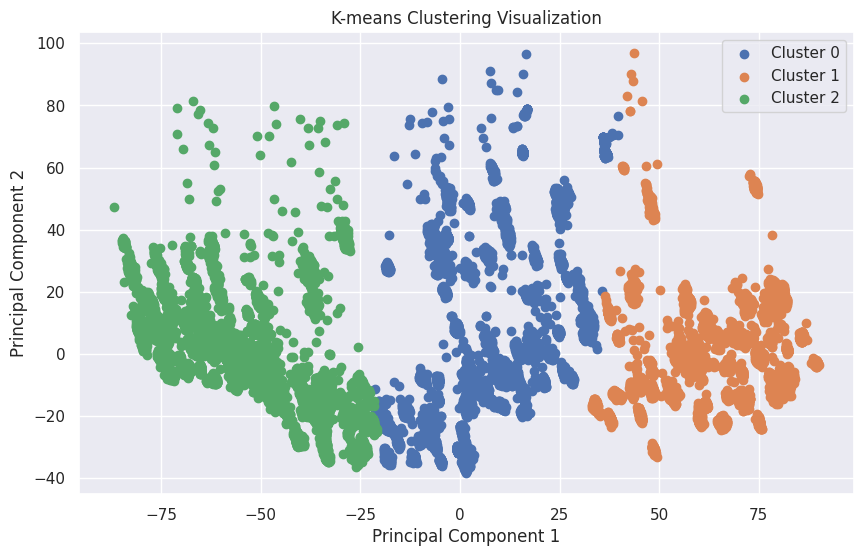

In [50]:
# Apply K-means clustering
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(concat_dataset)
print(cluster_labels)
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(concat_dataset)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(pca_data[cluster_labels == cluster, 0], pca_data[cluster_labels == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Visualization')
plt.legend()
plt.show()

In [44]:
test_cluster_labels = kmeans.predict(test_dataset)

# Reduce dimensionality of test data for visualization (using the same PCA model)
pca_test_data = pca.transform(test_dataset)

# Visualize the test data with cluster labels
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(pca_data[cluster_labels == cluster, 0], pca_data[cluster_labels == cluster, 1], label=f'Cluster {cluster}', alpha=0.5)
for cluster in range(k):
    plt.scatter(pca_test_data[test_cluster_labels == cluster, 0], pca_test_data[test_cluster_labels == cluster, 1], label=f'Test Cluster {cluster}', alpha=0.5, marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Visualization with Test Data')
plt.legend()
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- target
